In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
data = pd.read_csv('drive/My Drive/yoga-go/combined_keypoints.csv')

print("First few rows of the dataset:")
print(data.head())

print(f"Dataset shape: {data.shape}")

# Class names to integers
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])  # Assuming 'Class' is the correct column name
print("\nMapping of classes:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Extract features and labels
X = data.drop(columns=['Class'])  # Features are all columns except 'Class'
y = data['Class']  # 'Class' column is our label

# Print the shape of features and labels
print("\nShape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y = to_categorical(y, num_classes=num_classes)


print("\nShape of X after reshaping:", X.shape)
print("Shape of y after one-hot encoding:", y.shape)

First few rows of the dataset:
        Class    Nose_x    Nose_y  Nose_conf  LeftEye_x  LeftEye_y  \
0  Warrior_II  0.275027  0.441496   0.838373   0.257330   0.454769   
1  Warrior_II  0.361404  0.488448   0.632348   0.354708   0.496576   
2  Warrior_II  0.226947  0.543324   0.787434   0.213398   0.533082   
3  Warrior_II  0.392478  0.374899   0.328839   0.381358   0.370187   
4  Warrior_II  0.223151  0.476531   0.887696   0.211527   0.493164   

   LeftEye_conf  RightEye_x  RightEye_y  RightEye_conf  ...  LeftKnee_conf  \
0      0.874609    0.258129    0.449623       0.896995  ...       0.941765   
1      0.715429    0.351345    0.491862       0.855811  ...       0.829439   
2      0.857410    0.214061    0.525327       0.864843  ...       0.923154   
3      0.546548    0.383478    0.369107       0.577419  ...       0.324949   
4      0.910345    0.209859    0.482766       0.860895  ...       0.828863   

   RightKnee_x  RightKnee_y  RightKnee_conf  LeftAnkle_x  LeftAnkle_y  \
0     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


print("\nShape of X_train after reshaping:", X_train.shape)
print("Shape of X_test after reshaping:", X_test.shape)


Shape of X_train after reshaping: (10981, 1, 51)
Shape of X_test after reshaping: (2746, 1, 51)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential()


model.add(Bidirectional(LSTM(units=512, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))


model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))


model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(0.1))


model.add(Dense(units=num_classes, activation='softmax'))


optimizer = 'adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print("\nModel summary:")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 1024)             │       2,310,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 512)              │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 82)                  │           5,330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,702,290 (21.75 MB)

 Trainable params: 5,702,290 (21.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

#early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)


#history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[reduce_lr, early_stop], verbose=1)
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.0232 - loss: 4.3660 - val_accuracy: 0.0519 - val_loss: 4.0188
Epoch 2/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.0574 - loss: 3.8504 - val_accuracy: 0.0960 - val_loss: 3.4492
Epoch 3/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.0919 - loss: 3.4417 - val_accuracy: 0.1616 - val_loss: 3.1447
Epoch 4/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.1452 - loss: 3.1129 - val_accuracy: 0.1675 - val_loss: 2.9832
Epoch 5/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.1882 - loss: 2.8319 - val_accuracy: 0.2604 - val_loss: 2.6152
Epoch 6/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.2390 - loss: 2.6341 - val_accuracy: 0.2649 - val_loss: 2.5423
Epoch 7/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.2699 - loss: 2.4464 - val_accuracy: 0.3427 - val_loss: 2.2812
Epoch 8/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.3287 -

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
loss = model.evaluate(X_test, y_test, verbose=0)[0]

print(f'Precision (weighted): {precision * 100:.2f}%')
print(f'F1-score (weighted): {f1 * 100:.2f}%')
print(f'Loss: {loss:.4f}')

86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step

Accuracy: 79.10%
Precision (weighted): 79.97%
F1-score (weighted): 78.95%
Loss: 1.4582


In [ ]:
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)


Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.93      0.64      0.76        22
                          Boat       0.96      0.88      0.91        49
                   Bound_Angle       0.80      0.76      0.78        37
           Bow_or_Dhanurasana_       0.83      0.92      0.88        38
                        Bridge       0.97      0.94      0.95        32
                         Camel       0.87      0.93      0.90        28
                       Cat_Cow       0.90      0.92      0.91        39
                         Chair       0.87      0.93      0.90        28
                         Child       0.74      0.87      0.80        39
                         Cobra       0.90      0.92      0.91        97
                      Cockerel       0.55      0.48      0.51        23
                        Corpse       0.74      0.78      0.76        36
                      Cow_Face       0.

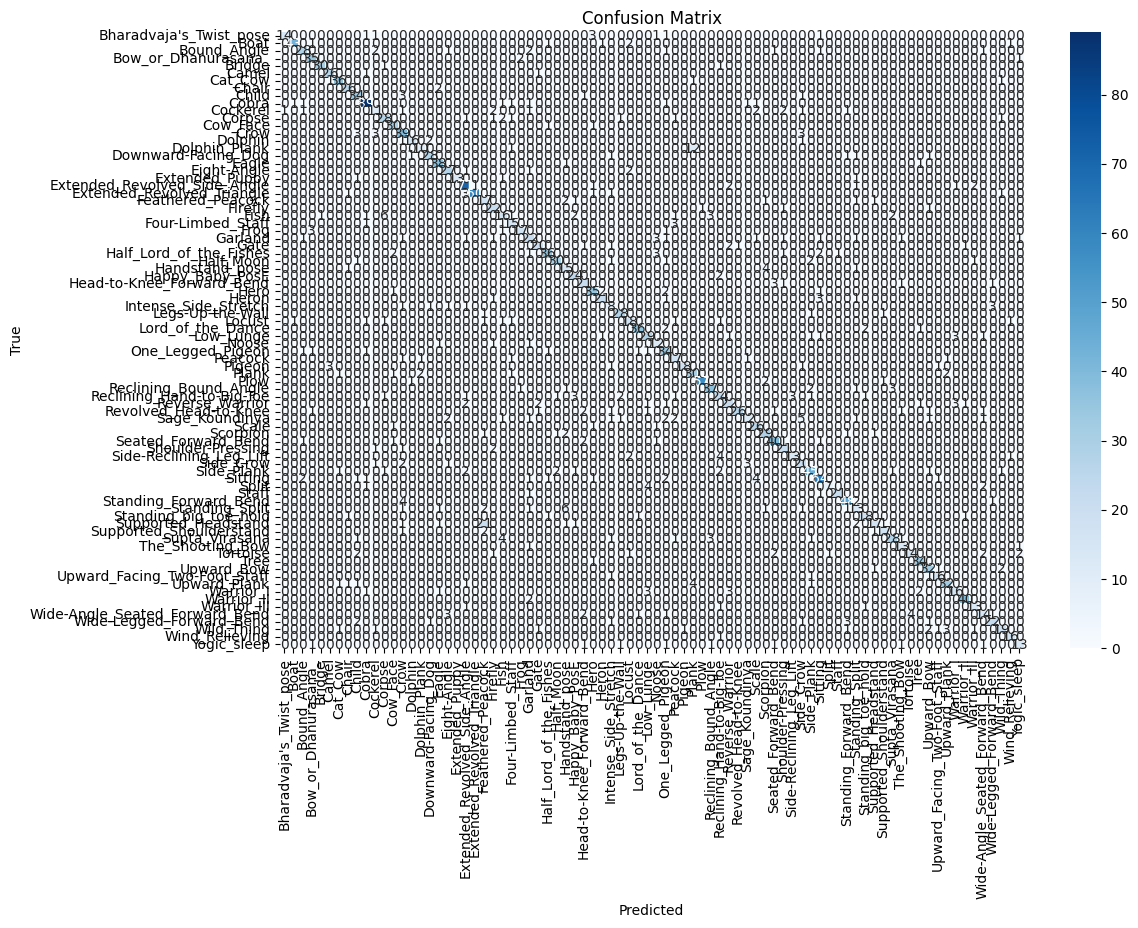

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

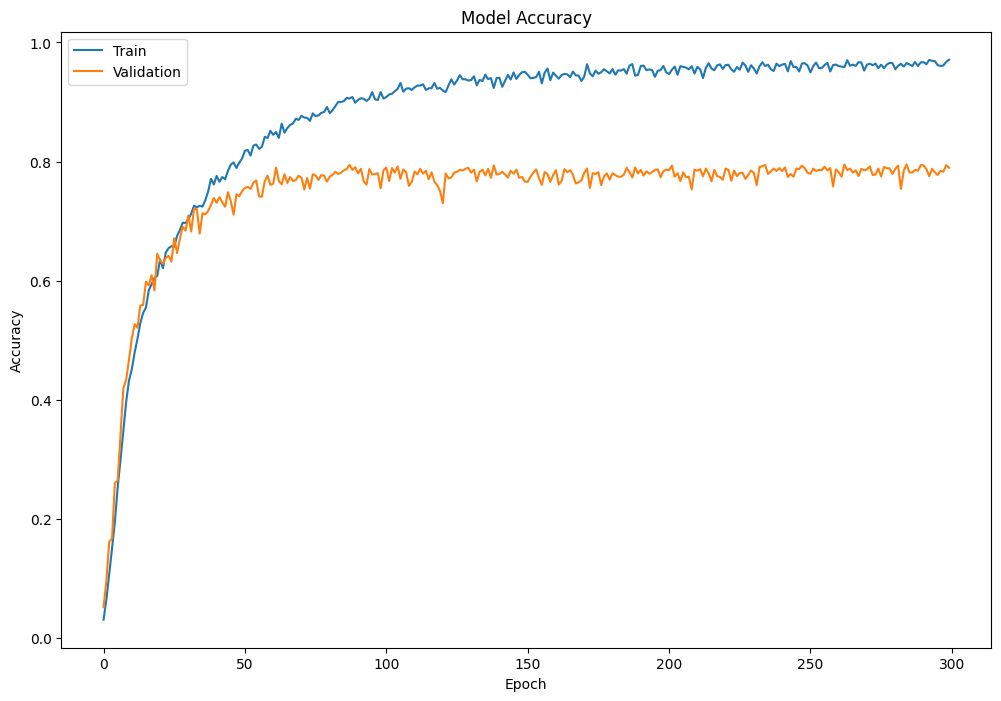

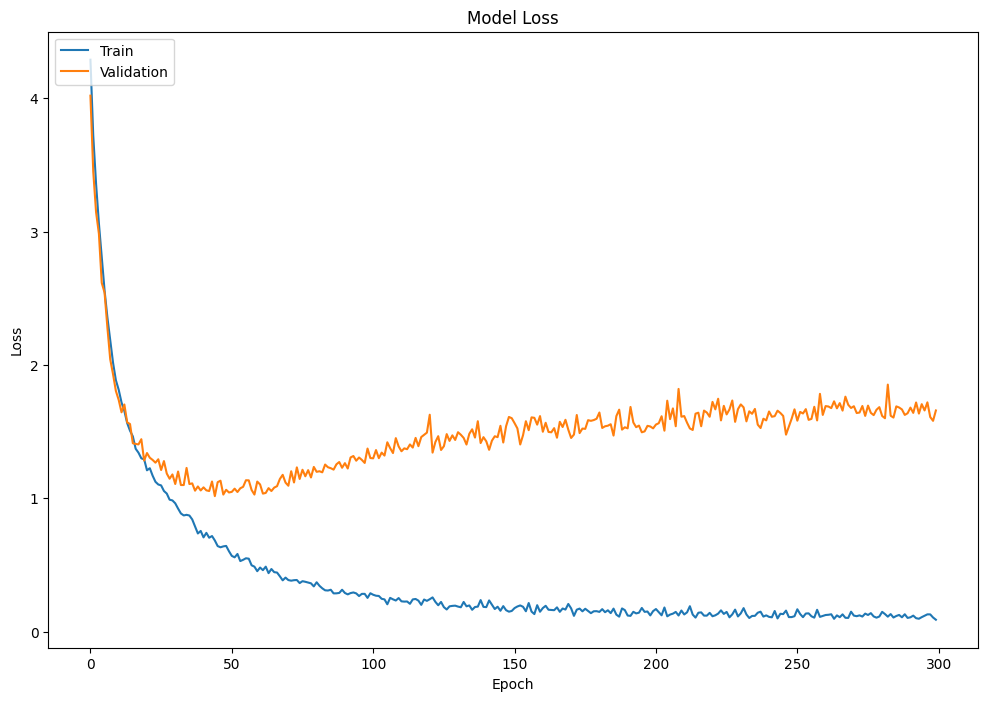

In [ ]:
# Training & validation plotting
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Training & validation loss plotting
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print('class')